In [6]:
import pandas as pd
import numpy as np
import glob
import re
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib as mpl
import plotly.express as px

In [16]:
df = pd.read_excel('DC-10-uncertainty.xlsx')

In [17]:
df

,Number of cascades stages,Attenuation,Uncertainty
0,1,16.61,0.220
1,2,33.22,0.260
2,3,49.83,0.290
3,4,66.44,0.320
4,5,83.05,0.350
5,6,99.66,0.380
6,7,116.27,0.400
7,8,132.88,0.420
8,9,149.49,0.445


<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
C:\Users\karth\AppData\Local\Temp\ipykernel_30920\1816419754.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Coupling Length L = $10 \mathrm{\mu m}$', fontsize=14)


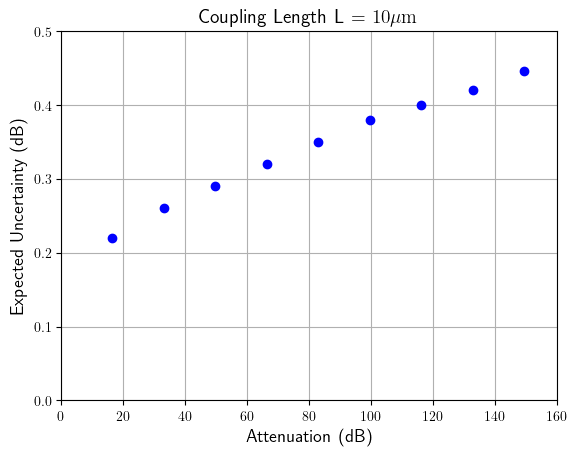

In [36]:
# fig.tight_layout(pad=2)
# plt.style.use('tableau-colorblind10')
plt.rcParams['text.usetex'] = True
mpl.rc('mathtext', default='regular')
plt.plot(df['Attenuation'], df['Uncertainty'], 'o', color='blue')
plt.xticks(np.arange(0, 161, 20))
plt.yticks(np.arange(0, 0.55, 0.1))
plt.xlabel('Attenuation (dB)', fontsize=13)
plt.ylabel('Expected Uncertainty (dB)', fontsize=13)
plt.title('Coupling Length L = $10 \mathrm{\mu m}$', fontsize=14)
plt.grid()
plt.savefig('DC_10_uncertainty.pdf', format='pdf')
plt.show()


# Data plotting into subplots for each reticle

In [12]:
for reticle in pd.unique(large_database['Reticle']):
    marker_dict = {10:'o', 15:'^', 20:'P', 25:'D'}
    df = large_database[large_database['Reticle'] == reticle]
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=False, tight_layout = True, sharex=True)
    fig.tight_layout(pad=2)
    # plt.style.use('tableau-colorblind10')
    plt.rcParams['text.usetex'] = True
    mpl.rc('mathtext', default='regular')
    
    marker_size = 80

    
    for coupler_length in pd.unique(df['Coupler length (um)']):
        
        df_coupler = df[df['Coupler length (um)'] == coupler_length]
        ax = axes[(int(coupler_length)//20), (int(coupler_length)//5)%2]
        
        
        l1 = ax.scatter(df_coupler['Cross'], 10 * df_coupler['log_fractional_power'], label='Fractional Power', color = 'green', marker = marker_dict[int(coupler_length)], s = marker_size, facecolors = 'none')
        ax.errorbar(df_coupler['Cross'], 10 * df_coupler['log_fractional_power'], yerr= 10 * df_coupler['log_fractional_power_error'], fmt='none', color = 'green')
        l2 = ax.scatter(df_coupler['Cross'], 10 * df_coupler['log_photocurrent'], label='Photocurrent', color = 'blue', marker = marker_dict[int(coupler_length)], s = marker_size)
        ax.errorbar(df_coupler['Cross'], 10 * df_coupler['log_photocurrent'], yerr= 10 * df_coupler['log_photocurrent_error'], fmt='none', color = 'blue')
        # ax.grid()
    
                    
        line_photocurrent, slope_photocurrent, intercept_photocurrent, std_err_photocurrent = weighted_regression_photocurrent(df_coupler)
        line_power, slope_power, intercept_power, std_err_power = weighted_regression_power(df_coupler)
        
        ax.plot(df_coupler["Cross"], 10 * line_power, linestyle='--', label='Regression Power', color = 'green')
        ax.plot(df_coupler["Cross"], 10 * line_photocurrent, linestyle='--', label='Regression Photocurrent', color = 'blue')
        ax.set_xticks([0,1,2,3,4])
        ax.set_yticks([0,-10,-20,-30,-40,-50,-60])
        ax.set_axisbelow(True)

        
        fig.legend([l1, l2], labels = ["Fractional Power", "Photocurrent"], loc = 'upper right', borderaxespad = 0.1, title = "Legend", bbox_to_anchor = (0.95,0.95))
        ax.set_title(f"Coupler length = {coupler_length} $\mu$m", size = 16)
        # fig.suptitle(f"Reticle = {reticle}", size = 16)
        plt.setp(axes[-1, :], xlabel='Number of Crosses #')
        # ax.set_xlabel(None, size=12, weight='demibold', labelpad=0.33)
    
    filename = f'T5-D103-{reticle}_attenutation.svg'
    filename_pdf = f'T5-D103-{reticle}_attenutation.pdf'
    # fig.supxlabel('Cross', size = 16)
    fig.supylabel('dB', size = 16)
    plt.savefig(filename, format='svg')
    plt.savefig(filename_pdf, format='pdf')
    plt.show()

    
    

C:\Users\karth\AppData\Local\Temp\ipykernel_4076\2735340386.py:37: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([l1, l2], labels = ["Fractional Power", "Photocurrent"], loc = 'upper right', borderaxespad = 0.1, title = "Legend", bbox_to_anchor = (0.95,0.95))
C:\Users\karth\AppData\Local\Temp\ipykernel_4076\2735340386.py:37: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([l1, l2], labels = ["Fractional Power", "Photocurrent"], loc = 'upper right', borderaxespad = 0.1, title = "Legend", bbox_to_anchor = (0.95,0.95))
C:\Users\karth\AppData\Local\Temp\ipykernel_4076\2735340386.py:37: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([l1, l2], labels = ["Fractional Power", "Photocurrent"], loc = 'upper right', borderaxespad = 0.1, title = "Legend", bbox_to_anchor = (0.95,0.95))
C:\Users\karth\AppData\Local\Temp\ipykernel_40

RuntimeError: latex was not able to process the following string:
b'Number of Crosses #'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpxp2u7x7h 410e5a552f174d36ddb834745ecac903.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (MiKTeX 23.4) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(410e5a552f174d36ddb834745ecac903.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-03-30>
(C:\Program Files\MiKTeX\tex/latex/base\article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(C:\Program Files\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\karth\AppData\Roaming\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\karth\AppData\Roaming\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Program Files\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Program Files\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\karth\AppData\Roaming\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Program Files\MiKTeX\tex/latex/graphics\keyval.sty)
(C:\Program Files\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Program Files\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\karth\AppData\Roaming\MiKTeX\tex/latex/geometry\geometry.cfg))
(C:\Users\karth\AppData\Roaming\MiKTeX\tex/latex/underscore\underscore.sty)
(C:\Program Files\MiKTeX\tex/latex/base\textcomp.sty)
(C:\Program Files\MiKTeX\tex/latex/l3backend\l3backend-dvips.def)
No file 410e5a552f174d36ddb834745ecac903.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! You can't use `macro parameter character #' in horizontal mode.
l.29 {\sffamily Number of Crosses #
                                   }%
No pages of output.
Transcript written on C:\Users\karth\.matplotlib\tex.cache\41\0e\tmpxp2u7x7h\41
0e5a552f174d36ddb834745ecac903.log.




Error in callback <function _draw_all_if_interactive at 0x000001F68307D800> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'Number of Crosses #'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmplrnxdikl 410e5a552f174d36ddb834745ecac903.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (MiKTeX 23.4) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(410e5a552f174d36ddb834745ecac903.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-03-30>
(C:\Program Files\MiKTeX\tex/latex/base\article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(C:\Program Files\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\karth\AppData\Roaming\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\karth\AppData\Roaming\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Program Files\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Program Files\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\karth\AppData\Roaming\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Program Files\MiKTeX\tex/latex/graphics\keyval.sty)
(C:\Program Files\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Program Files\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\karth\AppData\Roaming\MiKTeX\tex/latex/geometry\geometry.cfg))
(C:\Users\karth\AppData\Roaming\MiKTeX\tex/latex/underscore\underscore.sty)
(C:\Program Files\MiKTeX\tex/latex/base\textcomp.sty)
(C:\Program Files\MiKTeX\tex/latex/l3backend\l3backend-dvips.def)
No file 410e5a552f174d36ddb834745ecac903.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! You can't use `macro parameter character #' in horizontal mode.
l.29 {\sffamily Number of Crosses #
                                   }%
No pages of output.
Transcript written on C:\Users\karth\.matplotlib\tex.cache\41\0e\tmplrnxdikl\41
0e5a552f174d36ddb834745ecac903.log.




RuntimeError: latex was not able to process the following string:
b'Number of Crosses #'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpi8l2u71u 410e5a552f174d36ddb834745ecac903.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (MiKTeX 23.4) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(410e5a552f174d36ddb834745ecac903.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-03-30>
(C:\Program Files\MiKTeX\tex/latex/base\article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(C:\Program Files\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\karth\AppData\Roaming\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\karth\AppData\Roaming\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Program Files\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Program Files\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\karth\AppData\Roaming\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Program Files\MiKTeX\tex/latex/graphics\keyval.sty)
(C:\Program Files\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Program Files\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\karth\AppData\Roaming\MiKTeX\tex/latex/geometry\geometry.cfg))
(C:\Users\karth\AppData\Roaming\MiKTeX\tex/latex/underscore\underscore.sty)
(C:\Program Files\MiKTeX\tex/latex/base\textcomp.sty)
(C:\Program Files\MiKTeX\tex/latex/l3backend\l3backend-dvips.def)
No file 410e5a552f174d36ddb834745ecac903.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! You can't use `macro parameter character #' in horizontal mode.
l.29 {\sffamily Number of Crosses #
                                   }%
No pages of output.
Transcript written on C:\Users\karth\.matplotlib\tex.cache\41\0e\tmpi8l2u71u\41
0e5a552f174d36ddb834745ecac903.log.




<Figure size 1200x800 with 4 Axes>

In [5]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- NumPy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    # variance = 1/(np.sum(weights))
    return (average, np.sqrt(variance))

In [6]:
weighted_list = []
for coupling_length in data['Coupling length (um)'].unique():
    data_temp = data.loc[data['Coupling length (um)'] == coupling_length]
    
    weights_photocurrent = 1/((data_temp['Log photocurrent gradient error'])**2)
    weights_power = 1/((data_temp['Log fractional power gradient error'])**2)
    
    weighted_mean_photocurrent, weighted_std_photocurrent = weighted_avg_and_std(data_temp['Log Photocurrent gradient'], weights=weights_photocurrent)
    weighted_mean_power, weighted_std_power = weighted_avg_and_std(data_temp['Log fractional power gradient'], weights=weights_power)
    
    weighted_list.append({"Coupling length (um)": coupling_length,
                          "Weighted mean": weighted_mean_photocurrent,
                          "Weighted error": weighted_std_photocurrent,
                          "Weighted fractional power mean": weighted_mean_power,
                          "Weighted fractional power error": weighted_std_power})
data_weighted = pd.DataFrame(weighted_list)


In [7]:
theoretical_list_t2 = [0.99, 0.98, 0.97, 0.96]
theoretical_fractional_power_mean = np.log10(1 - np.array(theoretical_list_t2)**2)

data_weighted["Theoretical fractional power"] = theoretical_fractional_power_mean
data_weighted_rounded = data_weighted.round(3)
data_weighted_rounded = data_weighted_rounded * -10
data_weighted_rounded['Coupling length (um)'] = data_weighted_rounded['Coupling length (um)']/(-10)
data_weighted_rounded = data_weighted_rounded.abs()
data_weighted_rounded['Coupling length (um)'] = data_weighted_rounded['Coupling length (um)'].astype('int')

print(data_weighted_rounded.to_latex(index=False, multirow=True, multicolumn=True))

\begin{tabular}{rrrrrr}
\toprule
 Coupling length (um) &  Weighted mean &  Weighted error &  Weighted fractional power mean &  Weighted fractional power error &  Theoretical fractional power \\
\midrule
                   10 &          16.60 &            0.06 &                           16.62 &                             0.14 &                         17.01 \\
                   15 &          14.58 &            0.27 &                           14.49 &                             0.37 &                         14.02 \\
                   20 &          12.74 &            0.16 &                           12.90 &                             0.25 &                         12.28 \\
                   25 &          11.26 &            0.30 &                           11.07 &                             0.28 &                         11.06 \\
\bottomrule
\end{tabular}



C:\Users\karth\AppData\Local\Temp\ipykernel_23500\3894955044.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(data_weighted_rounded.to_latex(index=False, multirow=True, multicolumn=True))


# Plotting overall gradients

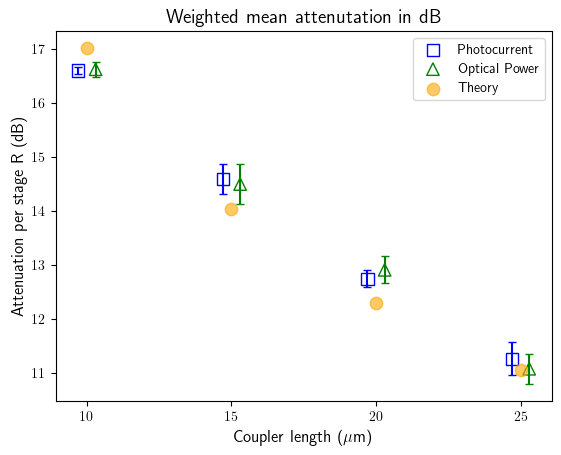

In [15]:
mpl.rc('mathtext', default='regular')
mpl.rcParams['mathtext.default'] = 'regular'
fig = plt.figure()
ax = fig.add_subplot(111)
plt.rcParams['text.usetex'] = True

ax.scatter(data_weighted['Coupling length (um)'] - 0.3, -10 * data_weighted['Weighted mean'],color = 'blue', label = 'Photocurrent', marker='s', s = marker_size, facecolors = 'none')
plt.errorbar(data_weighted['Coupling length (um)'] - 0.3, -10 * data_weighted['Weighted mean'], yerr= 10 * data_weighted['Weighted error'], fmt='none', color = 'blue', capsize=3)
ax.scatter(data_weighted['Coupling length (um)'] + 0.3, -10 * data_weighted['Weighted fractional power mean'],color = 'green', label = 'Optical Power', marker='^', s = marker_size, facecolors = 'none')
plt.errorbar(data_weighted['Coupling length (um)'] + 0.3, -10 * data_weighted['Weighted fractional power mean'], yerr = 10 * data_weighted['Weighted fractional power error'], fmt='none', color = 'green', capsize=3)
ax.scatter(data_weighted['Coupling length (um)'], -10 * data_weighted['Theoretical fractional power'],color = 'orange', label = 'Theory', marker='o', s = marker_size, alpha = 0.6)
ax.set_xlabel("Coupler length ($\mu$m)", fontsize = 12)
ax.set_ylabel("Attenuation per stage R (dB)", fontsize = 12)
ax.set_axisbelow(True)
plt.xticks(np.arange(10, 30, 5.0))

ax.legend(loc=0)
plt.title("Weighted mean attenutation in dB", fontsize = 14)
filename = 'T5-D103_gradients_offset.svg'
filename_pdf = 'T5-D103_gradients_offset.pdf'
plt.savefig(filename, format='svg')
plt.savefig(filename_pdf, format='pdf')
plt.show()

## Full scatter of all datapoints

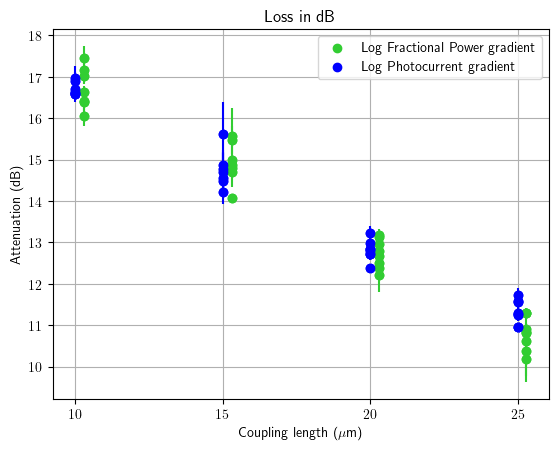

In [24]:
mpl.rc('mathtext', default='regular')
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(data['Coupling length (um)'] + 0.3, -10 * data['Log fractional power gradient'], color = 'limegreen', label = 'Log Fractional Power gradient')
plt.errorbar(data['Coupling length (um)'] + 0.3, -10 * data['Log fractional power gradient'], yerr = 10 * data['Log fractional power gradient error'], fmt='o', color = 'limegreen')
ax.scatter(data['Coupling length (um)'], -10 * data['Log Photocurrent gradient'],color = 'blue', label = 'Log Photocurrent gradient')
plt.errorbar(data['Coupling length (um)'], -10 * data['Log Photocurrent gradient'], yerr= 10 * data['Log photocurrent gradient error'], fmt='o', color = 'blue')
ax.grid()
ax.set_xlabel("Coupling length ($\mu$m)")
ax.set_ylabel("Attenuation (dB)")
plt.xticks(np.arange(10, 30, 5.0))

ax.legend(loc=0)
plt.title("Loss in dB")
filename = 'T5-D103_gradients.svg'
plt.savefig(filename, format='svg')
plt.show()

In [8]:
data_weighted

,Coupling length (um),Weighted mean,Weighted error,Weighted fractional power mean,Weighted fractional power error,Theoretical fractional power
0,10,-1.659742,0.006497,-1.661835,0.014164,-1.701147
1,15,-1.458425,0.027295,-1.449199,0.036760,-1.402305
2,20,-1.273601,0.015874,-1.290357,0.025154,-1.228413
3,25,-1.125584,0.030314,-1.107162,0.028242,-1.105684


In [9]:
wavelength = 685e-9
photon_energy = 6.627e-34 * 299792458/wavelength
laser_power = 1e-3
photons_per_second = laser_power/photon_energy

photon_counts = np.array([1, 10, 100, 1000, 10000])

In [10]:

perm_weighted_numbers = []
perm_weighted_coupler = []
photon_count_list = []
attenuation_errors_list = []
actual_photons_list = []
for couplers in data_weighted['Coupling length (um)'].unique():
    
    for photons in photon_counts:
        temp_weighted_coupler = []
        temp_weighted = data_weighted.loc[data_weighted['Coupling length (um)'] == couplers]
        temp_weighted_coupler.append(couplers)
        perm_weighted_coupler.append(temp_weighted_coupler)
        
        n  = (1/temp_weighted['Weighted mean'].unique())*np.log10(photons/photons_per_second)
        n = np.round(n,1)
        n = np.ceil(n)
        perm_weighted_numbers.append(n)
        photon_count_list.append(photons)
        actual_photons = photons_per_second * (10**(n*temp_weighted['Weighted mean'].unique()))
        actual_photons_list.append(actual_photons)
        
        error = temp_weighted['Weighted error'].unique()
        cascaded_error = np.sqrt(n)*error
        attenuation_errors_list.append(cascaded_error)
    print(photon_counts, n)
   

# perm_weighted_errors = np.sqrt(perm_weighted_numbers) * temp_weighted['Weighted error'].unique()
# perm_weighted_errors_list = perm_weighted_errors.tolist()
actual_photons_list = np.concatenate(actual_photons_list).tolist()
perm_weighted_coupler = np.concatenate(perm_weighted_coupler).tolist()
perm_weighted_numbers = np.concatenate(perm_weighted_numbers).tolist()
attenuation_errors_list = np.concatenate(attenuation_errors_list).tolist()
# photon_count_list = np.concatenate(photon_count_list).tolist()
attenuation_errors_df = pd.DataFrame(perm_weighted_coupler, columns=['Coupling length (um)'])
attenuation_errors_df['Cascaded couplers'] = perm_weighted_numbers
attenuation_errors_df['Photon Count'] = photon_count_list
attenuation_errors_df['Cascaded errors'] = attenuation_errors_list
attenuation_errors_df['Actual Photons'] = actual_photons_list


[    1    10   100  1000 10000] [7.]
[    1    10   100  1000 10000] [8.]
[    1    10   100  1000 10000] [10.]
[    1    10   100  1000 10000] [11.]


In [11]:
attenuation_errors_df

,Coupling length (um),Cascaded couplers,Photon Count,Cascaded errors,Actual Photons
0,10,10.0,1,0.020544,0.087124
1,10,9.0,10,0.019490,3.979960
2,10,9.0,100,0.019490,3.979960
3,10,8.0,1000,0.018375,181.811045
4,10,7.0,10000,0.017189,8305.424642
5,15,11.0,1,0.090529,0.312517
6,15,10.0,10,0.086316,8.980470
7,15,10.0,100,0.086316,8.980470
8,15,9.0,1000,0.081886,258.062234
9,15,8.0,10000,0.077203,7415.660431


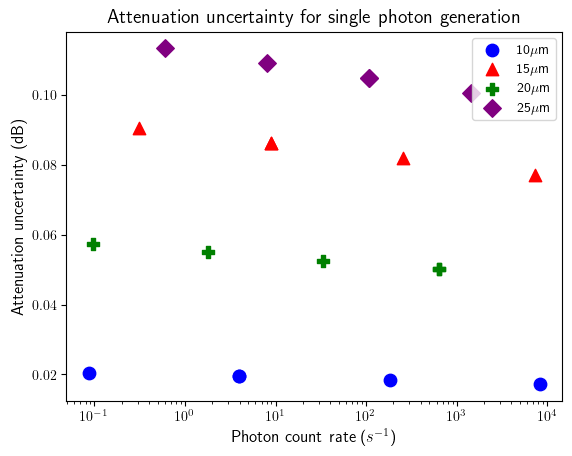

In [34]:
mpl.rc('mathtext', default='regular')
mpl.rcParams['mathtext.default'] = 'regular'
fig = plt.figure()
ax = fig.add_subplot(111)
plt.rcParams['text.usetex'] = True
marker_size = 80
colors = {10: 'blue', 15: 'red', 20: 'green', 25: 'purple'}
for couplers in attenuation_errors_df['Coupling length (um)'].unique():
    plotting_df = attenuation_errors_df.loc[attenuation_errors_df['Coupling length (um)'] == couplers]
    ax.scatter(plotting_df['Actual Photons'], plotting_df['Cascaded errors'], color = colors[couplers], label = f'{couplers}$\mu$m', marker=marker_dict[couplers], s = marker_size)
ax.set_xlabel("Photon count rate ($s^{-1}$)", fontsize = 12)
ax.set_ylabel("Attenuation uncertainty (dB)", fontsize = 12)
ax.set_xscale('log')
ax.set_axisbelow(True)

ax.legend(loc=0)
plt.title("Attenuation uncertainty for single photon generation", fontsize = 14)
filename = 'Attenuation_uncertainty.svg'
filename_pdf = 'Attenuation_uncertainty.pdf'
plt.savefig(filename, format='svg')
plt.savefig(filename_pdf, format='pdf')
plt.show()